# Titanic Dataset - Classificazione

In questo notebook utilizzeremo il dataset `Titanic` che contiene alcune informazioni relative ai passeggeri del Titanic, nave tristemente famosa in quanto è affondata durante il viaggio di inaugurazione causando centinaia di morti. 

Utilizzeremo questo dataset per sviluppare un modello di **classificazione**, che ci permetterà di prevedere la sopravvivenza o meno dei passeggeri. Nella prima sezione vedremo come implementare un Albero decisionale per la classificazione. Nella seconda vedremo altri modelli di classificazione un po' più complessi.

<a id="0"></a> <br>

# Indice
1. [Pre-processing dei dati](#1)
2. [Exploratory Data Analysis](#2)
3. [Implementazione e valutazione del modello Decision Tree](#3)
4. [Altri modelli di classificazione](#4)

<a id="1"></a> <br>
## 1. Pre-processing dei dati

Lo step fondamentale prima di applicare un modello di Machine Learning è quello di studiare le caratteristiche principali dei dati per renderli utilizzabili dal modello che sceglieremo. In questa sezione, metteremo in pratica le tecniche viste nelle precedenti lezioni per analizzare il dataset, in particolare dovremo:
- caricare il dataset
- estrarre le prime descrizioni generali (dimensione, tipo di dati, variabili, ...)
- gestire i valori mancanti
- gestire variabili categoriche

- Caricamento del dataset e descrizione generale

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Caricamento del dataset
df = pd.read_csv('../data/Titanic_data.csv')

# Stampa le prime dieci righe
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.93,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.46,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.86,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.08,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.13,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.07,NaN,C


In [3]:
# Che dimensione ha il dataset? Quante righe e quante colonne ha?
df.shape

(891, 12)

In [4]:
# Quali sono i nomi delle variabili presenti nel dataset?
df.columns.to_list()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

Il dataset contiene 8 variabili:

1. **PassengerId**: ID del passeggero

2. **Pclass**: classe del biglietto del passeggero passeggero (1 = prima classe, 2 = seconda classe, 3 = terza classe)

3. **Name**: nome del passeggero

4. **Sex**: sesso del passeggero

5. **Age**:: età del passeggero

6. **SibSp**: indica quanti fratelli/sorelle o mogli/spose il passeggero aveva sul Titanic

7. **Parch**: indica quanti mamme/papà o figli il passeggero aveva sul Titanic

8. **Ticket**: numero diel biglietto

9. **Fare**: tariffa pagata dal passeggero

10. **Cabin**: numero della cabina

11. **Embarked**: porto d'imbarco del passegero (C = Cherbourg, Q = Queenstown, S = Southampton)

12. **Survived**: indica se il passeggero è sopravvissuto o no (0 = No, 1 = Yes)

In [5]:
# Alcune informazioni importanti sul dataset (possiamo usare il metodo .info())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Tipo di dato in ogni colonna
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
# Caratteristiche statistiche principali per le variabili numeriche
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.205017
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693389
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.915000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.450000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.330000


- Valori mancanti

In [8]:
# Quanti valori nulli ci sono in ogni colonna?
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Calcoliamo la percentuale di dati mancanti per ogni variabile
missing_values = df.isna().sum()
missing_percentage = (missing_values / len(df)) * 100
print("Missing Values and Percentages:\n", pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percentage
}))

Missing Values and Percentages:
              Missing Count  Percentage
PassengerId              0    0.000000
Survived                 0    0.000000
Pclass                   0    0.000000
Name                     0    0.000000
Sex                      0    0.000000
Age                    177   19.865320
SibSp                    0    0.000000
Parch                    0    0.000000
Ticket                   0    0.000000
Fare                     0    0.000000
Cabin                  687   77.104377
Embarked                 2    0.224467


In [10]:
# Come gestiamo i valori nulli?
# Ci sono vari metodi per gestire i dati mancanti: possiamo eliminare dal dataset le righe corrispondenti, sostituirli con un valore medio o con il valore mediano, ...
# In questo caso, ci sono tre variabili che presentano dei valorinulli: Age, Cabin, Embarked.

# Per quanto riguarda la variabile 'Cabin', siccome oltre il 70% dei passeggeri presenti nel dataset hanno un valore nullo e
# tale variabile non sembra essere correlata con la variabile survived, decidiamo di eliminare tutta la variabile dal dataset
df.drop('Cabin', axis=1, inplace=True)

In [11]:
# Per quanto riguarda la variabile 'Age' siccome c'è un numero considerevole di dati mancanti (quasi il 20%), 
# proviamo a sostituire tali valori mancanti con la mediana che è più robusta agli outlier rispetto alla media)
df['Age'] = df['Age'].fillna(df['Age'].median())

In [12]:
# Infine, per quanto riguarda la variabile 'Embarked' siccome ci sono solo due valori mancanti li sostituiamo con la moda (valore più frequente)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

- Variabili categoriche

Ci sono tre variabili categoriche:
- **Pclass**: Ordinale (1st, 2nd, 3rd class) -> non necessita di encoding in quanto i valori sono già numerici (1,2,3)
- **Sex**: Nominale (Male, Female) -> Label Encoding (Male -> 0, Female-> 1)
- **Embarked**: Nominale (C, Q, S) -> One-Hot encoding

In [13]:
# Label Encoding per 'Sex' (binaria -> 'male': 0, 'female': 1)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [14]:
# One-Hot Encoding per 'Embarked'
from sklearn.preprocessing import OneHotEncoder

# Inizializzazione dell'encoder
encoder = OneHotEncoder(sparse_output=False)

# Slezioniamo la variabile categorica da codificare
embarked_encoded = encoder.fit_transform(df[['Embarked']])

# Convertiamo i dati codificati in un DataFrame con nomi delle colonne significativi
embarked_encoded_df = pd.DataFrame(embarked_encoded, columns=encoder.get_feature_names_out(['Embarked']))

# Aggiungiamo le colonne codificate nel DataFrame originale
df = pd.concat([df, embarked_encoded_df], axis=1)

# Eliminiamo la colonna originale 'Embarked' dal dataset
df = df.drop('Embarked', axis=1)

# Mostriamo il DataFrame aggiornato
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.25,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.28,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.93,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.10,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.05,0.0,0.0,1.0


<a id="2"></a> <br>
## 2. Exploratory Data Analysis

In questa sezione utilizzeremo dei metodi di visualizzazione dei dati per continuare ad analizzare le caratteristiche del dataset. 
In particolare dovremo:
- plottare la correlation heatmap per valutare la correlazione tra le diverse variabili
- studiare come sono distribuite le diverse variabili

- Correlazione

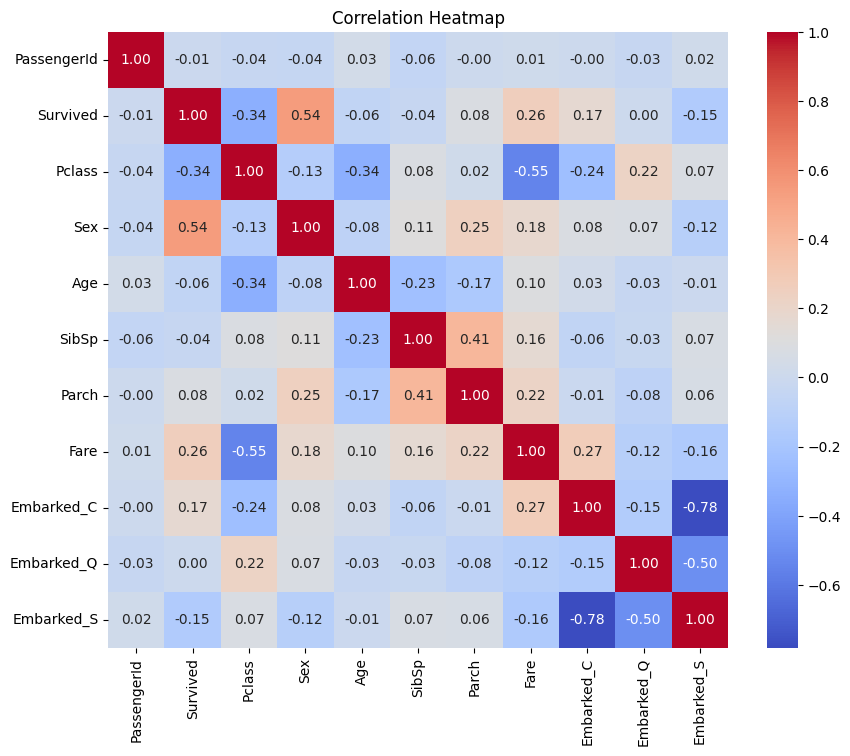

In [15]:
# Stampiamo la correlation heatmap per valutare la correlazione tra le variabili
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

- Distribuzione delle variabili

In [16]:
# Com'è distribuito il numero di sopravvissuti in base al sesso?
df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex  Survived
0    0           468
     1           109
1    0            81
     1           233
Name: Survived, dtype: int64

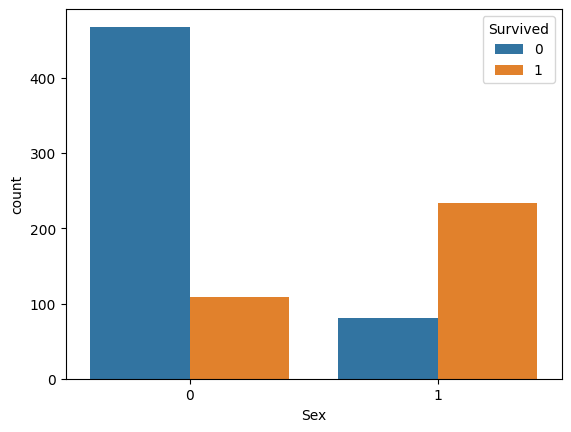

In [17]:
# Visualizziamo il risultato precedente
sns.countplot(x='Sex',hue='Survived',data=df)
plt.show()

In [18]:
# Com'è distribuito il numero di sopravvissuti in base al lla classe del biglietto?
df.groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

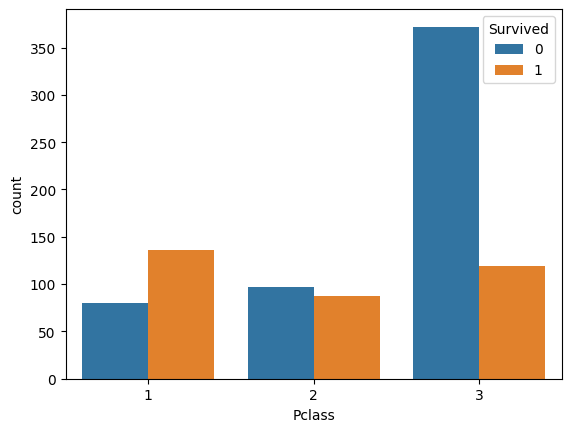

In [19]:
# Visualizziamo il risultato precedente
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.show()

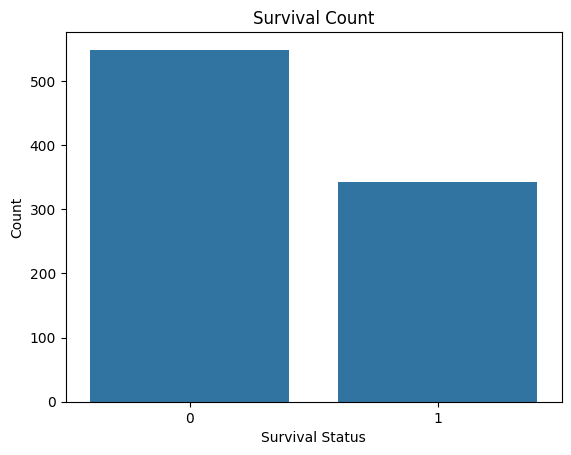

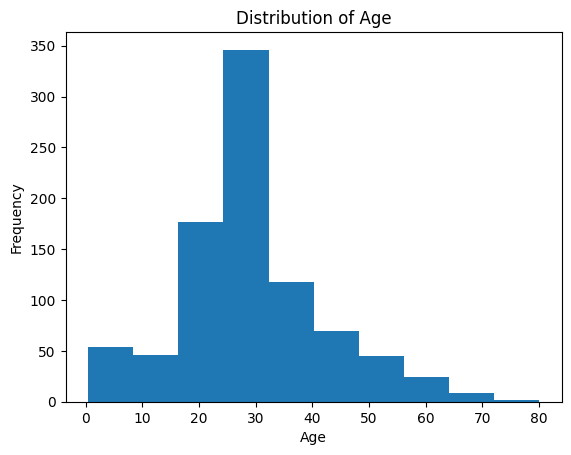

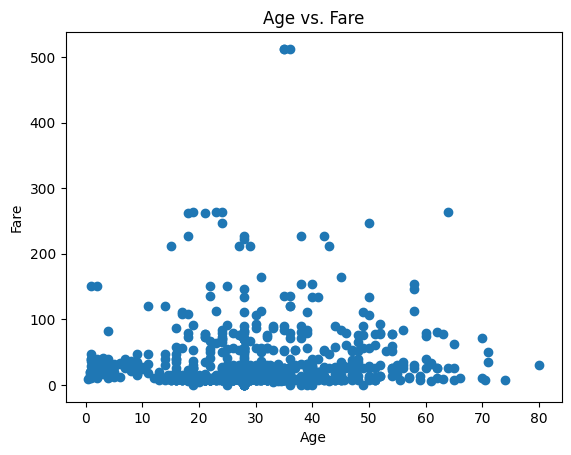

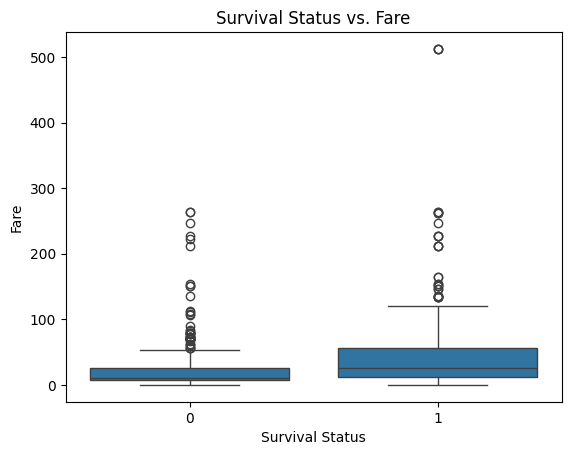

In [20]:
# Bar plot
sns.countplot(x='Survived', data=df)
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.title('Survival Count')
plt.show()

# Histogram
plt.hist(df['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

# Scatter plot
plt.scatter(df['Age'], df['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs. Fare')
plt.show()

# Box plot
sns.boxplot(x=df['Survived'], y=df['Fare'])
plt.xlabel('Survival Status')
plt.ylabel('Fare')
plt.title('Survival Status vs. Fare')
plt.show()

- Colonne da eliminare

In [21]:
# Colonne da eliminare (non servono per il modello)
columns_to_drop = ["PassengerId","Name","Ticket"]

# Eliminiamo le colonne non necessarie al modello
df_cleaned = df.drop(columns=columns_to_drop)

<a id="3"></a> <br>

## 3. Implementazione e valutazione del modello di Decision Tree

In questa sezione costruiremo e alleneremo il Decision tree Classifier (seguendo gli step illustrati nella presentazione). Infine valuteremo il modello ottenuto calcolando la matrice di confusione e le metriche ad essa associate.

DecisionTreeClassifier (documentazione): https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [23]:
# Definiamo le variabili di input (X) e di output (y)
X = df_cleaned.drop(columns=['Survived' ])
y= df_cleaned['Survived' ]

In [24]:
# Dividiamo i dati in training (80%) e test(20%)
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size= 0.20 , random_state=42)

In [25]:
X_train.shape

(712, 9)

In [26]:
y_train.shape

(712,)

In [27]:
# Creiamo il Decision Tree Classifier
model = DecisionTreeClassifier(random_state=123)

In [28]:
# Alleniamo il modello sui dati di training
model.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,123
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [29]:
# Facciamo previsioni sui dati di test
y_predict = model.predict(X_test)

In [30]:
# Valutiamo il modello

# Stampiamo la matrice di confusione
confusion = confusion_matrix(y_test, y_predict)
print(confusion)

[[83 22]
 [17 57]]


In [31]:
# Accuratezza del modello
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)

0.7821229050279329


In [32]:
# Report dettagliato delle metriche
report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       105
           1       0.72      0.77      0.75        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.78      0.78       179



In [33]:
# Plot dell'albero
from sklearn.tree import plot_tree
plt.figure(figsize=(100,100))
plot_tree(model, filled=True, feature_names=X_train.columns, fontsize=10)
plt.savefig('./decisiontree.png')
plt.show()

Il modello Decision Tree permette di settare i valori per diversi parametri, ma quali sono i valori migliori? 

**GridSearch** che è un metodo per trovare automaticamente i migliori parametri di un modello. Invece di provare i valori manualmente, **GridSearchCV** testa tutte le combinazioni possibili di parametri e sceglie quella che dà le migliori prestazioni, basandosi su una metrica di valutazione.

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
cross_valid_scores = {}

In [36]:
cross_valid_scores = {}

# Definiamo i valori possibili per la profondità massima dell'albero
parameters = {
    "max_depth": [3, 5, 7, 9, 11, 13],
}

model_desicion_tree = DecisionTreeClassifier(
    random_state=123,
    class_weight='balanced', # Bilancia automaticamente le classi se sono sbilanciate
)

model_desicion_tree = GridSearchCV(
    model_desicion_tree, # Modello da ottimizzare
    parameters, # Dizionario dei parametri da testare
    cv=5, # Numero di suddivisioni per la cross-validation (5-fold CV)
    scoring='accuracy', # Metrica di valutazione da ottimizzare
)

model_desicion_tree.fit(X_train, y_train)

print(f'Migliore combinazione di parametri trovati {model_desicion_tree.best_params_}')
print(
    f'Media delle accuratezze ottenuta con la cross-validation per il miglior modello: ' + \
    f'{model_desicion_tree.best_score_:.3f}'
)
cross_valid_scores['desicion_tree'] = model_desicion_tree.best_score_

Migliore combinazione di parametri trovati {'max_depth': 3}
Media delle accuratezze ottenuta con la cross-validation per il miglior modello: 0.819


<a id="4"></a> <br>

## 4. Altri modelli di classificazione

In questa sezione testremo dei modelli di classificazione alternativi al Decision Tree
- Random Forest Classifier
- Logistic Regression Classifier

*Random Forest Classifier*: È un modello di machine learning basato su più alberi decisionali. Ogni albero fa una previsione e la classe finale viene scelta con una votazione della maggioranza, ovvero la classe che ottiene il maggior numero di "voti" da parte degli alberi viene scelta come previsione del modello.

*Logistic Regression*: Nonostante il nome, è un modello di classificazione, non di regressione. Pprevede la probabilità che un'osservazione appartenga a una certa classe (es. 0 o 1). È semplice, veloce e adatto per problemi di classificazione binaria.

- Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
# Creiamo il modello di Random Forest Classifier
rf = RandomForestClassifier()

# Alleniamo il modello sui dati di training
rf.fit(X_train, y_train)

# Facciamo previsioni sui dati di test
rf_pred = rf.predict(X_test)

In [39]:
# Valutiamo il modello

# Stampiamo la matrice di confusione
confusion = confusion_matrix(y_test, rf_pred)
print(confusion)

[[89 16]
 [17 57]]


In [40]:
# Accuratezza del modello
accuracy_rf = accuracy_score(y_test, rf_pred)
print(accuracy_rf)

0.8156424581005587


In [41]:
# Report dettagliato delle metriche
report = (classification_report(y_test, rf_pred))
print(report)

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       105
           1       0.78      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [42]:
# GridSearchCV per trovare i migliori parametri per il modello Random Forest

parameters = {
    "n_estimators": [5, 10, 15, 20, 25], 
    "max_depth": [3, 5, 7, 9, 11, 13],
}

model_random_forest = RandomForestClassifier(
    random_state=123,
    class_weight='balanced',
)

model_random_forest = GridSearchCV(
    model_random_forest, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_random_forest.fit(X_train, y_train)

print(f'Migliore combinazione di parametri trovati {model_desicion_tree.best_params_}')
print(
    f'Media delle accuratezze ottenuta con la cross-validation per il miglior modello: ' + \
    f'{model_random_forest.best_score_:.3f}'
)
cross_valid_scores['random_forest'] = model_random_forest.best_score_

Migliore combinazione di parametri trovati {'max_depth': 3}
Media delle accuratezze ottenuta con la cross-validation per il miglior modello: 0.816


- Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
# Creiamo il modello
logreg = LogisticRegression()

# Alleniamo il modello su dati di training
logreg.fit(X_train, y_train)

# Facciamo previsioni sui dati di test
logreg_pred = logreg.predict(X_test)

/home/eleonora/Desktop/Corsi/Corso base AI IT4LIA/corso-base-AI/venv_corso_AI/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
# Valutiamo il modello

# Stampiamo la matrice di confusione
confusion = confusion_matrix(y_test, logreg_pred)
print(confusion)

[[90 15]
 [20 54]]


In [46]:
# Report dettagliato delle metriche
report = classification_report(y_test, logreg_pred)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



In [47]:
# Accuratezza del modello
accuracy_logreg = accuracy_score(y_test, logreg_pred)
print(accuracy_logreg)

0.8044692737430168


Quale èil modello con l'accurateza migliore?

In [48]:
print('Decision Tree accuracy: ', accuracy)
print('Random Forest accuracy: ', accuracy_rf)
print('Logistic Regression accuracy: ', accuracy_logreg)

Decision Tree accuracy:  0.7821229050279329
Random Forest accuracy:  0.8156424581005587
Logistic Regression accuracy:  0.8044692737430168
